#Calculus for Machine Learning (7-day mini-course)
From [Machine Learning Mastery - Calculus for Machine Learning](https://machinelearningmastery.com/calculus-for-machine-learning-7-day-mini-course/), by Adrian Tam (2022/03/16)

* Lesson 01: Differential calculus
* Lesson 02: Integration
* Lesson 03: Gradient of a vector function
* Lesson 04: Jacobian
* Lesson 05: Backpropagation
* Lesson 06: Optimization
* Lesson 07: Support vector machine

# Lesson 01: Differential Calculus
$f(x)=x^2$

$f'(x) = {{f(x+δx)-f(x)}\over{\delta x}}$

$⇒ f'(x) = 2x$


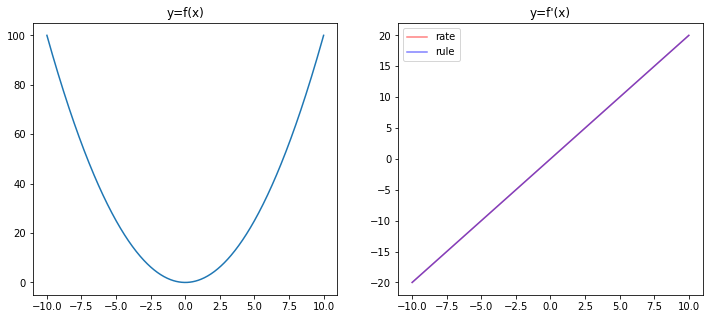

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define function f(x)
def f(x):
    return x**2

# compute f(x) = x^2 for x=-10 to x=10
x = np.linspace(-10,10,500)
y = f(x)
# Plot f(x) on left half of the figure
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(121)
ax.plot(x, y)
ax.set_title("y=f(x)")

# f'(x) using the rate of change
delta_x = 0.0001
y1 = (f(x+delta_x) - f(x))/delta_x
# f'(x) using the rule
y2 = 2 * x
# Plot f'(x) on right half of the figure
ax = fig.add_subplot(122)
ax.plot(x, y1, c="r", alpha=0.5, label="rate")
ax.plot(x, y2, c="b", alpha=0.5, label="rule")
ax.set_title("y=f'(x)")
ax.legend()

plt.show()

#Lesson 02: Integration
$f'(x) = 2x$

$f(x)=\int{f'(x)}dx=\int{2x}dx=x^2$


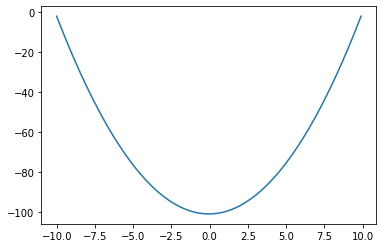

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 2*x

# Set up x from -10 to 10 with small steps
delta_x = 0.1
x = np.arange(-10, 10, delta_x)
# Find f(x) * delta_x
fx = f(x) * delta_x
# Compute the running sum
y = fx.cumsum()
# Plot
plt.plot(x, y)
plt.show()

#Lesson 03: Gradient of a vector function

$$f(x,y) = x^2 + y^3$$
$$\begin{aligned}
\frac{\partial f}{\partial x} &= 2x \\
\frac{\partial f}{\partial y} &= 3y^2
\end{aligned}$$

$$\nabla f(x,y) = \Big(\frac{\partial f}{\partial x},\; \frac{\partial f}{\partial y}\Big) = (2x,\;3y^2)$$

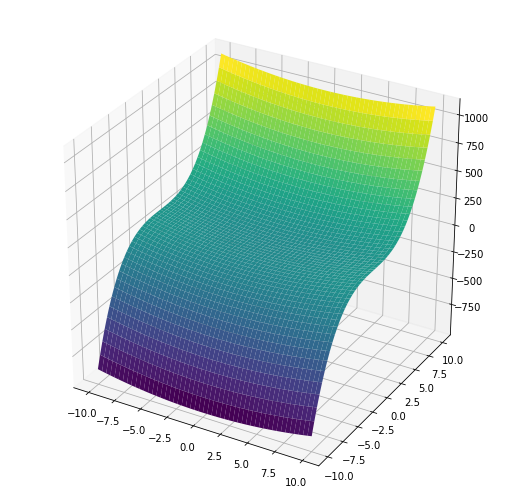

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range for x and y
x = np.linspace(-10,10,1000)
xv, yv = np.meshgrid(x, x, indexing='ij')

# Compute f(x,y) = x^2 + y^3
zv = xv**2 + yv**3

# Plot the surface
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(xv, yv, zv, cmap="viridis")
plt.show()

Therefore, at each coordinate $(x,y)$, the gradient **$\nabla f(x,y)$** is a vector. This vector tells us two things:

1. The direction of the vector points to where the function $f(x,y)$ is increasing the fastest
2. The size of the vector is the rate of change of the function $f(x,y)$ in this direction

One way to visualize the gradient is to consider it as a **vector field**:

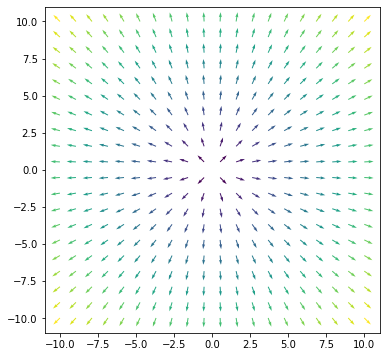

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range for x and y
x = np.linspace(-10,10,20)
xv, yv = np.meshgrid(x, x, indexing='ij')

# Compute the gradient of f(x,y)
fx = 2*xv
fy = 2*yv

# Convert the vector (fx,fy) into size and direction
size = np.sqrt(fx**2 + fy**2)
dir_x = fx/size
dir_y = fy/size

# Plot the surface
plt.figure(figsize=(6,6))
plt.quiver(xv, yv, dir_x, dir_y, size, cmap="viridis")
plt.show()

The viridis color map in matplotlib will show a larger value in yellow and a lower value in purple. Hence we see the gradient is “steeper” at the edges than in the center in the above plot.

If we consider the coordinate (2,3), we can check which direction $f(x,y)$ will increase the fastest using the following:

In [6]:
import numpy as np

def f(x, y):
    return x**2 + y**3

# 0 to 360 degrees at 0.1-degree steps
angles = np.arange(0, 360, 0.1)

# coordinate to check
x, y = 2, 3
# step size for differentiation
step = 0.0001

# To keep the size and direction of maximum rate of change
maxdf, maxangle = -np.inf, 0
for angle in angles:
    # convert degree to radian
    rad = angle * np.pi / 180
    # delta x and delta y for a fixed step size
    dx, dy = np.sin(rad)*step, np.cos(rad)*step
    # rate of change at a small step
    df = (f(x+dx, y+dy) - f(x,y))/step
    # keep the maximum rate of change
    if df > maxdf:
        maxdf, maxangle = df, angle

# Report the result
dx, dy = np.sin(maxangle*np.pi/180), np.cos(maxangle*np.pi/180)
gradx, grady = dx*maxdf, dy*maxdf
print(f"Max rate of change at {maxangle} degrees")
print(f"Gradient vector at ({x},{y}) is ({dx*maxdf},{dy*maxdf})")

Max rate of change at 8.4 degrees
Gradient vector at (2,3) is (3.987419245872443,27.002750276227097)


#Lesson 04: Jacobian

The function $f(x,y)=(p(x,y), q(x,y))=(2xy, x^2y)$
 is one with two input and two outputs. Sometimes we call this function taking vector arguments and returning a vector value. The differentiation of this function is a matrix called the ***Jacobian***. The Jacobian of the above function is:

$$ \mathbf{J} =
\begin{bmatrix}
\frac{\partial p}{\partial x} & \frac{\partial p}{\partial y} \\
\frac{\partial q}{\partial x} & \frac{\partial q}{\partial y}
\end{bmatrix}
=
\begin{bmatrix}
2y & 2x \\
2xy & x^2
\end{bmatrix}
$$


In [7]:
from sympy.abc import x, y
from sympy import Matrix, pprint

f = Matrix([2*x*y, x**2*y])
variables = Matrix([x,y])
pprint(f.jacobian(variables))

⎡ 2⋅y   2⋅x⎤
⎢          ⎥
⎢        2 ⎥
⎣2⋅x⋅y  x  ⎦


# Lesson 05: Backpropagation

If we consider a neural network with one hidden layer, we can represent it as a function:

$$y = g\Big(\sum_{k=1}^M u_k f_k\big(\sum_{i=1}^N w_{ik}x_i\big)\Big)$$

The input to the neural network is a vector $\mathbf{x}=(x_1, x_2, \cdots, x_N)$ and each $x_i$ will be multiplied with weight $W_{ik}$ and fed into the hidden layer. 
The output of neuron $k$ in the hidden layer will be multiplied with weight $u_k$ and fed into the output layer. The activation function of the hidden layer and output layer are $f$ and $g$ respectively.

If we consider $$z_k = f_k\big(\sum_{i=1}^N w_{ik}x_i\big)$$, then 
$$\frac{\partial y}{\partial x_i} = \sum_{k=1}^M \frac{\partial y}{\partial z_k}\frac{\partial z_k}{\partial x_i}$$.  Considering the entire layer at once, we have $\mathbf{z}=(z_1, z_2, \cdots, z_M)$, and then 
$$\frac{\partial y}{\partial \mathbf{x}} = \mathbf{W}^\top\frac{\partial y}{\partial \mathbf{z}}$$, where $W$ is the Jacobian matrix, and the element on row $k$ and column $i$ is $\frac{\partial z_k}{\partial x_i}$.

This is how the backpropagation algorithm works in training a neural network! For a network with multiple hidden layers, we need to compute the Jacobian matrix for each layer.

The code below implements a neural network model that you can try yourself. It has two hidden layers and a classification network to separate points in 2-dimension into two classes. Try to look at the function backward() and identify which is the Jacobian matrix.

In [8]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
import numpy as np
np.random.seed(0)

# Find a small float to avoid division by zero
epsilon = np.finfo(float).eps

# Sigmoid function and its differentiation
def sigmoid(z):
    return 1/(1+np.exp(-z.clip(-500, 500)))
def dsigmoid(z):
    s = sigmoid(z)
    return 2 * s * (1-s)

# ReLU function and its differentiation
def relu(z):
    return np.maximum(0, z)
def drelu(z):
    return (z > 0).astype(float)

# Loss function L(y, yhat) and its differentiation
def cross_entropy(y, yhat):
    """Binary cross entropy function
        L = - y log yhat - (1-y) log (1-yhat)

    Args:
        y, yhat (np.array): nx1 matrices which n are the number of data instances
    Returns:
        average cross entropy value of shape 1x1, averaging over the n instances
    """
    return ( -(y.T @ np.log(yhat.clip(epsilon)) +
               (1-y.T) @ np.log((1-yhat).clip(epsilon))
              ) / y.shape[1] )

def d_cross_entropy(y, yhat):
    """ dL/dyhat """
    return ( - np.divide(y, yhat.clip(epsilon))
             + np.divide(1-y, (1-yhat).clip(epsilon)) )

class mlp:
    '''Multilayer perceptron using numpy
    '''
    def __init__(self, layersizes, activations, derivatives, lossderiv):
        """remember config, then initialize array to hold NN parameters
        without init"""
        # hold NN config
        self.layersizes = tuple(layersizes)
        self.activations = tuple(activations)
        self.derivatives = tuple(derivatives)
        self.lossderiv = lossderiv
        # parameters, each is a 2D numpy array
        L = len(self.layersizes)
        self.z = [None] * L
        self.W = [None] * L
        self.b = [None] * L
        self.a = [None] * L
        self.dz = [None] * L
        self.dW = [None] * L
        self.db = [None] * L
        self.da = [None] * L

    def initialize(self, seed=42):
        """initialize the value of weight matrices and bias vectors with small
        random numbers."""
        np.random.seed(seed)
        sigma = 0.1
        for l, (n_in, n_out) in enumerate(zip(self.layersizes, self.layersizes[1:]), 1):
            self.W[l] = np.random.randn(n_in, n_out) * sigma
            self.b[l] = np.random.randn(1, n_out) * sigma

    def forward(self, x):
        """Feed forward using existing `W` and `b`, and overwrite the result
        variables `a` and `z`

        Args:
            x (numpy.ndarray): Input data to feed forward
        """
        self.a[0] = x
        for l, func in enumerate(self.activations, 1):
            # z = W a + b, with `a` as output from previous layer
            # `W` is of size rxs and `a` the size sxn with n the number of data
            # instances, `z` the size rxn, `b` is rx1 and broadcast to each
            # column of `z`
            self.z[l] = (self.a[l-1] @ self.W[l]) + self.b[l]
            # a = g(z), with `a` as output of this layer, of size rxn
            self.a[l] = func(self.z[l])
        return self.a[-1]

    def backward(self, y, yhat):
        """back propagation using NN output yhat and the reference output y,
        generates dW, dz, db, da
        """
        # first `da`, at the output
        self.da[-1] = self.lossderiv(y, yhat)
        for l, func in reversed(list(enumerate(self.derivatives, 1))):
            # compute the differentials at this layer
            self.dz[l] = self.da[l] * func(self.z[l])
            self.dW[l] = self.a[l-1].T @ self.dz[l]
            self.db[l] = np.mean(self.dz[l], axis=0, keepdims=True)
            self.da[l-1] = self.dz[l] @ self.W[l].T

    def update(self, eta):
        """Updates W and b

        Args:
            eta (float): Learning rate
        """
        for l in range(1, len(self.W)):
            self.W[l] -= eta * self.dW[l]
            self.b[l] -= eta * self.db[l]

# Make data: Two circles on x-y plane as a classification problem
X, y = make_circles(n_samples=1000, factor=0.5, noise=0.1)
y = y.reshape(-1,1) # our model expects a 2D array of (n_sample, n_dim)

# Build a model
model = mlp(layersizes=[2, 4, 3, 1],
            activations=[relu, relu, sigmoid],
            derivatives=[drelu, drelu, dsigmoid],
            lossderiv=d_cross_entropy)
model.initialize()
yhat = model.forward(X)
loss = cross_entropy(y, yhat)
score = accuracy_score(y, (yhat > 0.5))
print(f"Before training - loss value {loss} accuracy {score}")

# train for each epoch
n_epochs = 150
learning_rate = 0.005
for n in range(n_epochs):
    model.forward(X)
    yhat = model.a[-1]
    model.backward(y, yhat)
    model.update(learning_rate)
    loss = cross_entropy(y, yhat)
    score = accuracy_score(y, (yhat > 0.5))
    print(f"Iteration {n} - loss value {loss} accuracy {score}")

Before training - loss value [[693.62972747]] accuracy 0.5
Iteration 0 - loss value [[693.62972747]] accuracy 0.5
Iteration 1 - loss value [[693.62166655]] accuracy 0.5
Iteration 2 - loss value [[693.61534159]] accuracy 0.5
Iteration 3 - loss value [[693.60994018]] accuracy 0.5
Iteration 4 - loss value [[693.60515795]] accuracy 0.5
Iteration 5 - loss value [[693.60082044]] accuracy 0.5
Iteration 6 - loss value [[693.59683747]] accuracy 0.5
Iteration 7 - loss value [[693.59314676]] accuracy 0.5
Iteration 8 - loss value [[693.5896873]] accuracy 0.5
Iteration 9 - loss value [[693.58643119]] accuracy 0.5
Iteration 10 - loss value [[693.58333162]] accuracy 0.5
Iteration 11 - loss value [[693.58036603]] accuracy 0.5
Iteration 12 - loss value [[693.57752348]] accuracy 0.5
Iteration 13 - loss value [[693.57478667]] accuracy 0.5
Iteration 14 - loss value [[693.57214202]] accuracy 0.5
Iteration 15 - loss value [[693.56957462]] accuracy 0.5
Iteration 16 - loss value [[693.56707586]] accuracy 0.5


# Lesson 07: Support vector machine